## Varun Marthand

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.formula.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('ToyotaCorolla.csv',encoding='latin-1')

In [3]:
df 

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [5]:
X= df.iloc[:,3:]
X.drop(['Fuel_Type','Color'],axis =1 ,inplace =True)

In [6]:
y = df.iloc[:,2:3]
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [7]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
preds = lr.predict(X_test)

model_r2 = r2_score(y_test,preds)
model_r2

0.897705592559187

In [10]:
df1 = df.iloc[:,[2,3,4,5,6,8,12,13,14,15,16,17 ]]

In [11]:
df1

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,13500,23,10,2002,46986,90,2000,3,4,5,210,1165
1,13750,23,10,2002,72937,90,2000,3,4,5,210,1165
2,13950,24,9,2002,41711,90,2000,3,4,5,210,1165
3,14950,26,7,2002,48000,90,2000,3,4,5,210,1165
4,13750,30,3,2002,38500,90,2000,3,4,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1300,3,4,5,69,1025
1432,10845,72,9,1998,19000,86,1300,3,4,5,69,1015
1433,8500,71,10,1998,17016,86,1300,3,4,5,69,1015
1434,7250,70,11,1998,16916,86,1300,3,4,5,69,1015


In [12]:
df1.corr()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.126389,0.185326,NaN,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.098084,-0.148359,NaN,-0.005364,-0.198431,-0.470253
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.037387,-0.012069,NaN,-0.013063,0.031373,-0.002167
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.091892,0.151442,NaN,0.007766,0.193934,0.473478
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,0.102683,-0.036197,NaN,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.035856,0.092424,NaN,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,1.000000,0.079903,NaN,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.012069,0.151442,-0.036197,0.092424,0.079903,1.000000,NaN,-0.160141,0.109363,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,-0.013063,0.007766,0.015023,0.209477,0.014629,-0.160141,NaN,1.000000,-0.005452,0.020613


In [13]:
df1.rename(columns={'Age_08_04':'age','Mfg_Month':'month','Mfg_Year':'year','Quarterly_Tax':'qt'},inplace=True)

C:\Users\Yash Bhosale\AppData\Local\Temp\ipykernel_22636\2022324458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Age_08_04':'age','Mfg_Month':'month','Mfg_Year':'year','Quarterly_Tax':'qt'},inplace=True)


In [14]:
df1.columns

Index(['Price', 'age', 'month', 'year', 'KM', 'HP', 'cc', 'Doors', 'Cylinders',
       'Gears', 'qt', 'Weight'],
      dtype='object')

In [15]:
model_1= smf.ols('Price~age+month+year+KM+HP+cc+Doors+Cylinders+Gears+qt+Weight',data=df1).fit()

In [16]:
model_1.params

Intercept     -0.010546
age         -125.738538
month       -105.130799
year          -1.902030
KM            -0.020291
HP            30.946463
cc            -0.082643
Doors         -4.353742
Cylinders     -0.042182
Gears        580.300277
qt             4.226658
Weight        16.098162
dtype: float64

In [17]:
model_1.pvalues

Intercept     6.372723e-82
age          1.124018e-312
month         1.914677e-23
year          5.611567e-03
KM            1.204253e-57
HP            1.075019e-28
cc            3.430008e-01
Doors         9.103346e-01
Cylinders     6.372723e-82
Gears         2.346810e-03
qt            8.636541e-04
Weight        1.754375e-50
dtype: float64

In [18]:
model_1.rsquared,model_1.rsquared_adj

(0.8729146059122899, 0.8721125241824235)

In [19]:
model_1_r2 = model_1.rsquared

In [20]:
tmodel= smf.ols('Price~cc+Doors',data=df1).fit()
tmodel.pvalues


Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64

In [21]:
tmodel_1= smf.ols('Price~Doors',data=df1).fit()
tmodel_1.pvalues



Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

In [22]:
tmodel_2= smf.ols('Price~cc',data=df1).fit()
tmodel_2.pvalues




Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64

In [25]:
r2_cc= smf.ols('cc~age+month+year+KM+HP+Doors+Cylinders+Gears+qt+Weight',data=df1).fit().rsquared
vif_cc = (1/(1 - r2_cc))

r2_door= smf.ols('Doors~age+month+year+KM+HP+cc+Cylinders+Gears+qt+Weight',data=df1).fit().rsquared
vif_door = (1/(1 - r2_door))



In [26]:
col = ['Door','cc']
val = r2_door,r2_cc

In [270]:
vif = pd.DataFrame(val,col)

In [271]:
vif

,0
Door,0.135421
cc,0.142445


In [48]:
sm.qqplot(model_1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

AttributeError: module 'statsmodels.formula.api' has no attribute 'qqplot'

In [279]:
list(np.where(model_1.resid<-6000))

[array([192, 221, 601, 960])]

In [280]:
df1[df.index.isin([221,192,601,960])]

,Price,age,month,year,KM,HP,cc,Doors,Cylinders,Gears,qt,Weight
192,4750,44,1,2001,131273,69,1800,5,4,5,64,1110
221,12450,44,1,2001,74172,110,1600,5,4,5,163,1615
601,7500,50,7,2000,1,90,2000,3,4,5,64,1260
960,9390,66,3,1999,50806,86,1300,3,4,5,19,1480


In [284]:
df1.describe()

,Price,age,month,year,KM,HP,cc,Doors,Cylinders,Gears,qt,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,1576.85585,4.033426,4.0,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,424.38677,0.952677,0.0,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,1300.00000,2.000000,4.0,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,1400.00000,3.000000,4.0,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1600.00000,4.000000,4.0,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1600.00000,5.000000,4.0,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,16000.00000,5.000000,4.0,6.000000,283.000000,1615.00000


In [285]:
df2= df1.drop([221,192,601,960])

In [313]:
model_2= smf.ols('Price~age+month+year+KM+HP+cc+Doors+Cylinders+Gears+qt+Weight',data=df2).fit()
model_2_r2 = model_2.rsquared
model_2.rsquared

0.8893277059809296

In [290]:
model_influence = model_2.get_influence()
(c,b) = model_influence.cooks_distance

<StemContainer object of 3 artists>

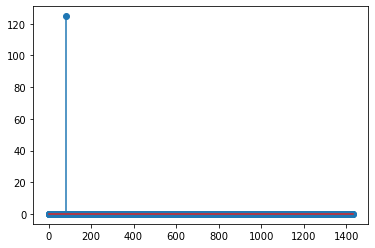

In [293]:
plt.stem(np.arange(len(df2)),c)

In [294]:
np.argmax(c),np.max(c)

(80, 124.77002355554306)

In [302]:
df2[df2.index.isin([80])]

,Price,age,month,year,KM,HP,cc,Doors,Cylinders,Gears,qt,Weight
80,18950,25,8,2002,20019,110,16000,5,4,5,100,1180


In [304]:
df3 = df2.drop(80)

In [319]:
model_3 = smf.ols('Price~age+month+year+KM+HP+cc+Doors+Cylinders+Gears+qt+Weight',data=df3).fit()
model_3_r2 = model_3.rsquared
model_3.rsquared

0.8983212351480547

In [308]:
from statsmodels.graphics.regressionplots import influence_plot

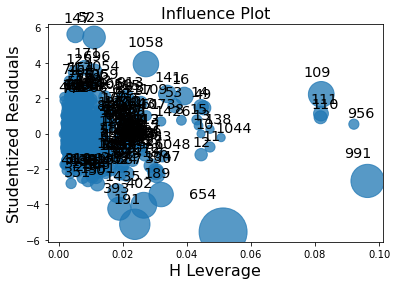

In [310]:
influence_plot(model_3);

In [311]:
k = df3.shape[1]
n = df3.shape[0]
levcut = 3*((k + 1)/n)
levcut

0.02725366876310272

In [321]:
r2 = model_r2,model_1_r2,model_2_r2,model_3_r2

In [322]:
modeln = [' Sklearn Model','OLS Model','Model without high resid point','Model without high influence point']

In [323]:
models = pd.DataFrame(r2,modeln)

In [324]:
models

,0
Sklearn Model,0.897706
OLS Model,0.872915
Model without high resid point,0.898321
Model without high influence point,0.898321
